<a href="https://colab.research.google.com/github/evildead23151/Retail-Sail-Quantity-Prediction-Challenge/blob/main/Retail_Sail_Quantity_Prediction_Challenge_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retail Sales Quantity Prediction
Project by: Gitesh Malik

The objective of this project is to develop a machine learning model that accurately predicts the sales_quantity for various products across different retail stores. The analysis is based on a comprehensive dataset containing product, store, customer, and economic attributes. This notebook details the entire process, from initial data exploration and feature engineering to model training, evaluation, and final prediction.

#1. Exploratory Data Analysis

1.1. Import necessary libraries for data manipulation, analysis, and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


1.2. Loading the Dataset
The first step is to load the train.csv dataset into a pandas DataFrame. We will then perform an initial inspection to understand its structure, including the number of rows and columns, data types, and a preview of the data itself.

In [3]:

df_train = pd.read_csv('train.csv')

print(f"The dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns.")

display(df_train.head())

The dataset has 900000 rows and 44 columns.


,date,day_of_week,month,quarter,is_weekend,is_holiday,store_id,region,store_type,city,...,stock_level,stock_out,temperature_celsius,economic_index,inflation_rate,sales_quantity,price_weight_ratio,revenue,customer_value_score,seasonal_score
0,2022-01-01,Saturday,1,1,1,0,ST_0046,East,Standalone,Jaipur,...,182,0,20.7,80.0,9.5,29.0,34.381579,1515.54,19.20780,0.8
1,2022-01-01,Saturday,1,1,1,0,ST_0303,East,Airport,Pune,...,357,0,16.3,103.7,4.5,16.0,134.527301,13797.12,70.49556,0.8
2,2022-01-01,Saturday,1,1,1,0,ST_0129,Central,Mall,Mumbai,...,346,0,22.6,NaN,10.1,7.0,20087.727273,46402.65,36.63408,0.8
3,2022-01-01,Saturday,1,1,1,0,ST_0297,North,Standalone,Jaipur,...,43,0,17.0,122.4,7.8,11.0,1585.480000,4360.07,46.96324,0.8
4,2022-01-01,Saturday,1,1,1,0,ST_0194,North,Airport,Ahmedabad,...,37,0,NaN,NaN,5.0,8.0,620.364706,4218.48,12.14316,0.8


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 44 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  900000 non-null  object 
 1   day_of_week           900000 non-null  object 
 2   month                 900000 non-null  int64  
 3   quarter               900000 non-null  int64  
 4   is_weekend            900000 non-null  int64  
 5   is_holiday            900000 non-null  int64  
 6   store_id              900000 non-null  object 
 7   region                900000 non-null  object 
 8   store_type            900000 non-null  object 
 9   city                  900000 non-null  object 
 10  store_size_sqft       900000 non-null  int64  
 11  establishment_year    900000 non-null  int64  
 12  parking_available     900000 non-null  int64  
 13  competition_distance  845974 non-null  float64
 14  competitor_count      900000 non-null  int64  
 15  

1.3. Missing Value Analysis
Handling missing data is a critical preprocessing step. First, we will quantify the number of missing values in each column and visualize them using a heatmap to quickly identify the most affected features.

Columns with missing data:


,Missing Values,Percentage
economic_index,107803,11.978111
customer_value_score,90767,10.085222
temperature_celsius,72036,8.004000
store_rating,54120,6.013333
competition_distance,54026,6.002889
marketing_spend,54015,6.001667
weight_kg,53880,5.986667
price_weight_ratio,53880,5.986667
customer_age,46585,5.176111
customer_income,46584,5.176000


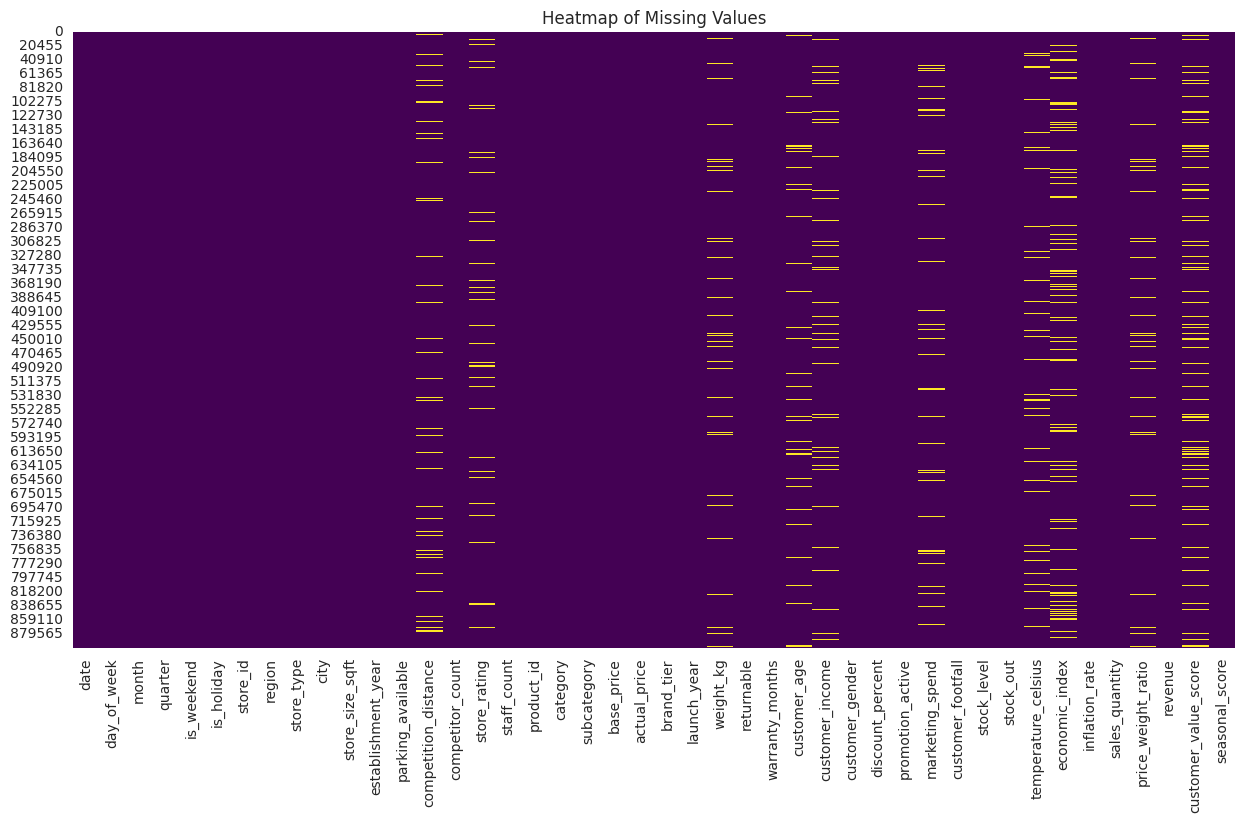

from matplotlib import pyplot as plt
_df_0['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Missing Values', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

print("Columns with missing data:")
display(missing_info[missing_info['Percentage'] > 0].sort_values(by='Percentage', ascending=False))

plt.figure(figsize=(15, 8))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

1.4. Descriptive Statistics

In [6]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
month,900000.0,6.175001,3.285599,1.000000,3.000000,6.000000,9.000000,1.200000e+01
quarter,900000.0,2.408377,1.083202,1.000000,1.000000,2.000000,3.000000,4.000000e+00
is_weekend,900000.0,0.286150,0.451961,0.000000,0.000000,0.000000,1.000000,1.000000e+00
is_holiday,900000.0,0.030032,0.170676,0.000000,0.000000,0.000000,0.000000,1.000000e+00
store_size_sqft,900000.0,7899.042949,4124.134962,1001.000000,4097.000000,8035.000000,11640.000000,1.497100e+04
establishment_year,900000.0,2016.163131,3.758154,2010.000000,2013.000000,2016.000000,2020.000000,2.022000e+03
parking_available,900000.0,0.697081,0.459521,0.000000,0.000000,1.000000,1.000000,1.000000e+00
competition_distance,845974.0,2151.655683,2306.142503,-2058.880000,657.402500,1530.070000,2869.687500,1.833328e+04
competitor_count,900000.0,3.000213,1.732902,0.000000,2.000000,3.000000,4.000000,1.500000e+01
store_rating,845880.0,3.995676,0.490300,1.600000,3.700000,4.000000,4.300000,5.000000e+00


1.5. Target Variable Distribution
Understanding the distribution of our target variable, sales_quantity, is essential

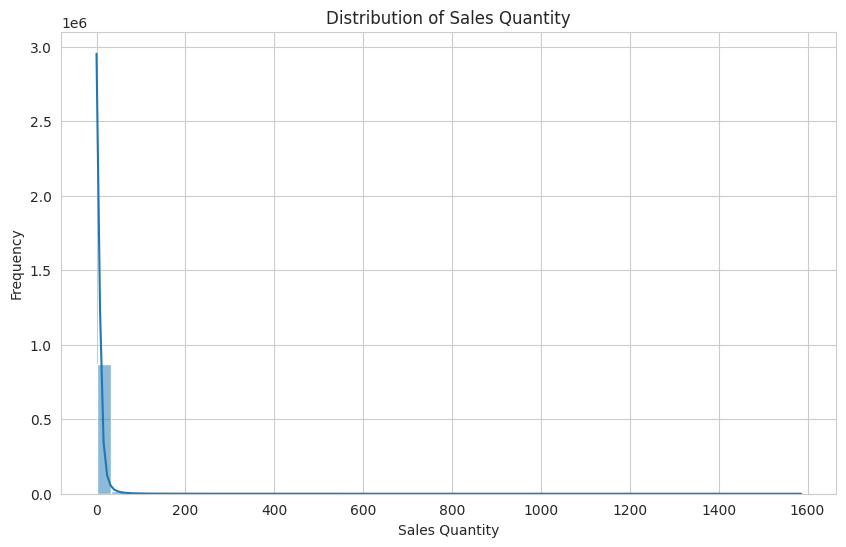

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['sales_quantity'], bins=50, kde=True)
plt.title('Distribution of Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Frequency')
plt.show()

Observation:

The distribution of sales_quantity is right-skewed, with a long tail. Most sales are of lower quantities, with a few instances of very high-quantity sales.

1.6.Categorical & Temporal Feature **analysis**

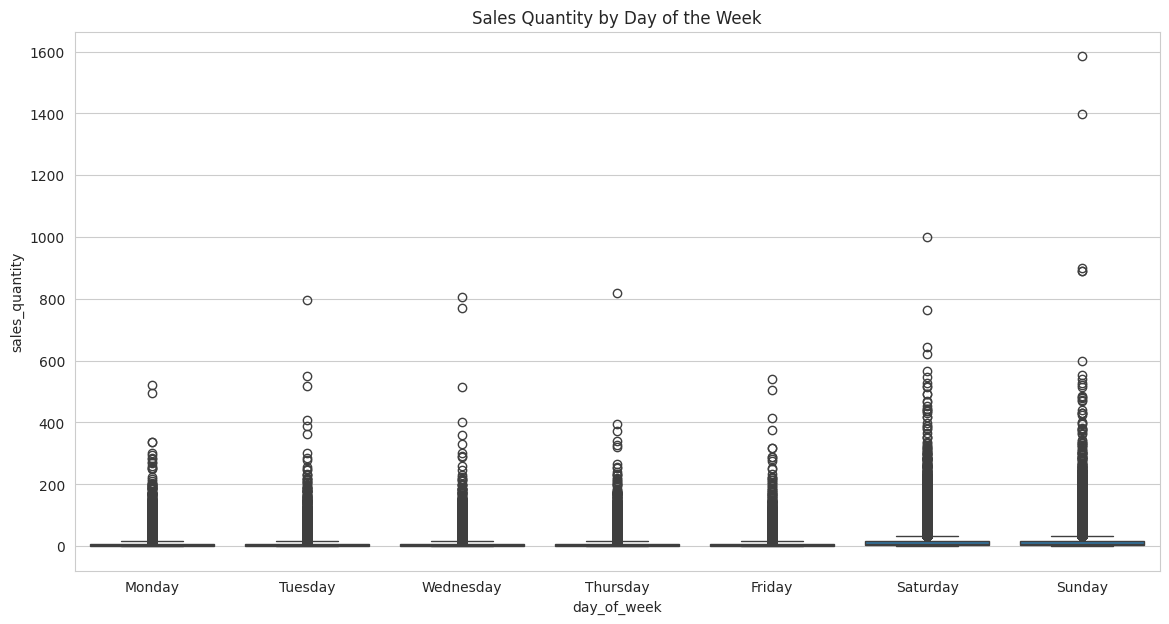

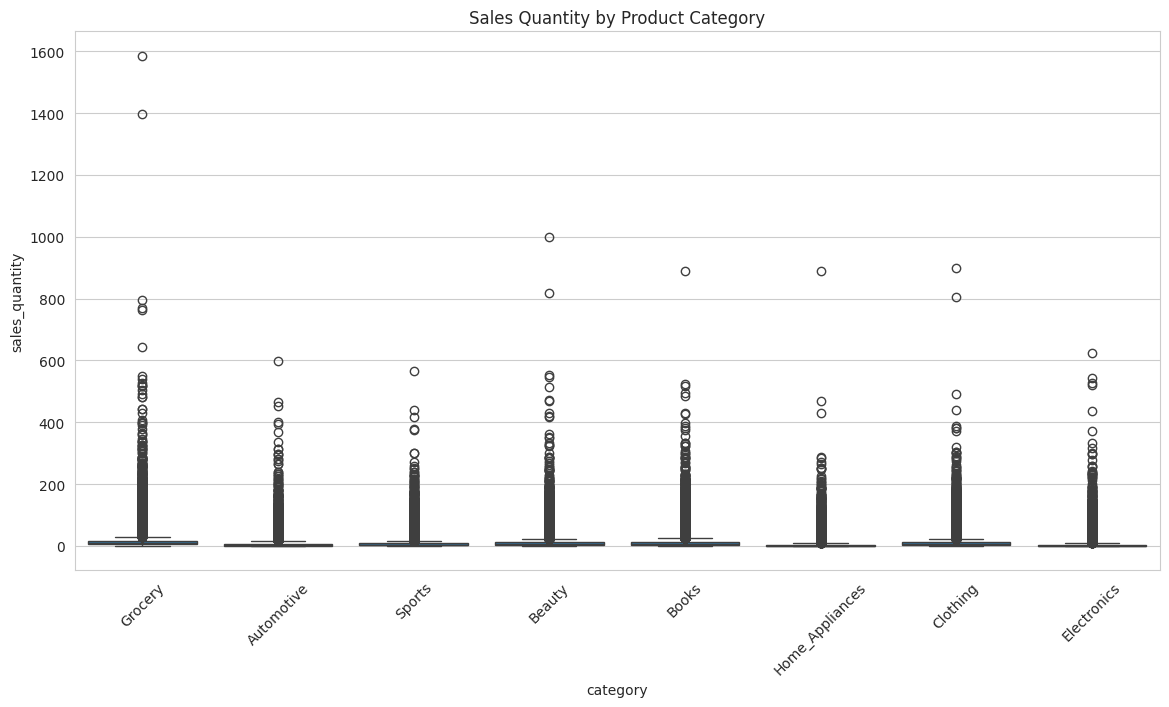

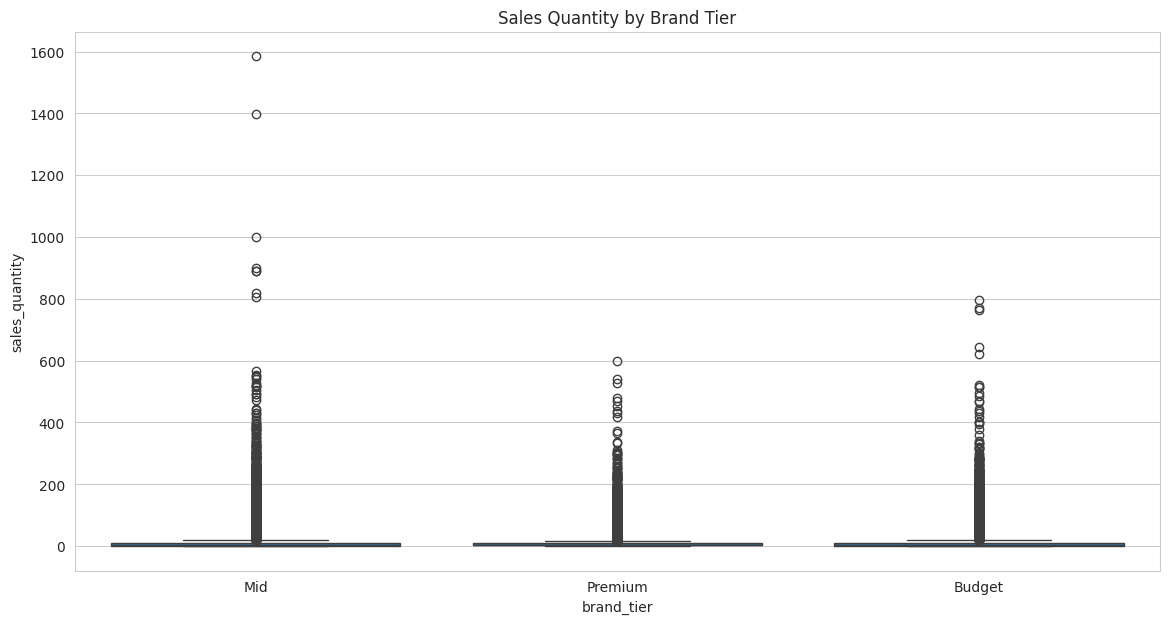

In [8]:
df_train['date'] = pd.to_datetime(df_train['date'])

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_train, x='day_of_week', y='sales_quantity', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Quantity by Day of the Week')
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_train, x='category', y='sales_quantity')
plt.title('Sales Quantity by Product Category')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_train, x='brand_tier', y='sales_quantity')
plt.title('Sales Quantity by Brand Tier')
plt.show()


1.7. Correlation Analysis

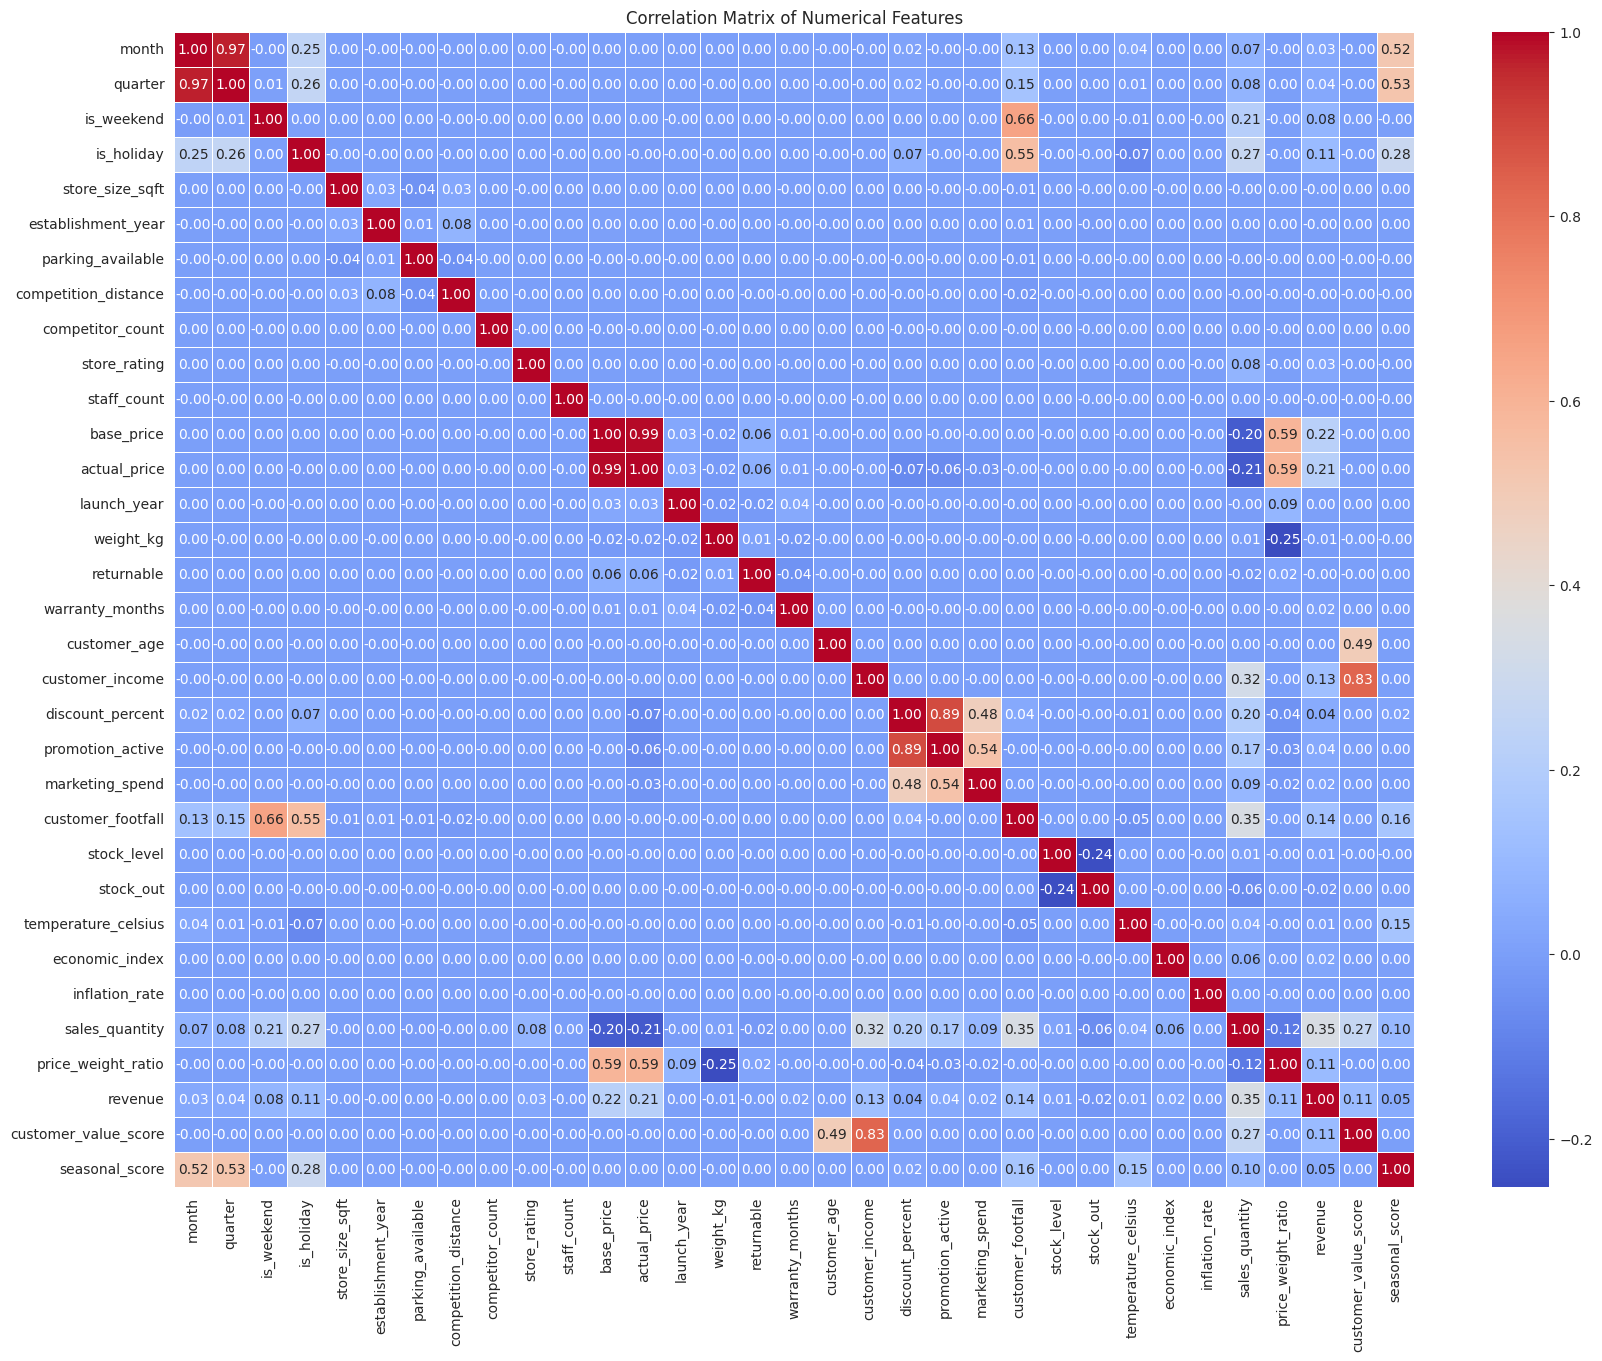

In [9]:
numerical_cols = df_train.select_dtypes(include=np.number).columns

corr_matrix = df_train[numerical_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Feature Engineering & Preprocessing

2.1. Handling Missing Values

In [26]:
df_processed = df_train.copy()

# Impute all numerical columns with median
numerical_cols = df_processed.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_val)

print("Missing values count after imputation:")
print(df_processed.isnull().sum().sum())

# 2.2. New Features
df_processed['price_difference'] = df_processed['base_price'] - df_processed['actual_price']
df_processed['is_discounted'] = (df_processed['price_difference'] > 0).astype(int)

current_year = df_processed['date'].dt.year.max()
df_processed['product_age_years'] = current_year - df_processed['launch_year']
df_processed['store_age_years'] = current_year - df_processed['establishment_year']

# Handle negative competition_distance values before log transformation
df_processed['competition_distance'] = df_processed['competition_distance'].apply(lambda x: max(0, x))
df_processed['log_competition_distance'] = np.log1p(df_processed['competition_distance'])

df_processed['footfall_x_marketing'] = df_processed['customer_footfall'] * df_processed['marketing_spend']

# Impute missing values in newly created features if any
for col in ['price_difference', 'is_discounted', 'product_age_years', 'store_age_years', 'log_competition_distance', 'footfall_x_marketing']:
    if df_processed[col].isnull().sum() > 0:
        median_val = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_val)


print("\nMissing values count after creating new features and imputation:")
print(df_processed.isnull().sum().sum())

# 2.3. Categorical Feature Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_processed.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    if col in FEATURES: # Only encode columns that will be used as features
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])

print("\nData types after encoding:")
df_processed.info()


# 3.1. Feature Selection & Data Splitting
from sklearn.model_selection import train_test_split

TARGET = 'sales_quantity'
features_to_drop = [TARGET, 'revenue', 'date', 'store_id', 'product_id', 'competition_distance']
FEATURES = [col for col in df_processed.columns if col not in features_to_drop]

X = df_processed[FEATURES]
y = df_processed[TARGET]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")

Missing values count after imputation:
0

Missing values count after creating new features and imputation:
0

Data types after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      900000 non-null  datetime64[ns]
 1   day_of_week               900000 non-null  int64         
 2   month                     900000 non-null  int64         
 3   quarter                   900000 non-null  int64         
 4   is_weekend                900000 non-null  int64         
 5   is_holiday                900000 non-null  int64         
 6   store_id                  900000 non-null  object        
 7   region                    900000 non-null  int64         
 8   store_type                900000 non-null  int64         
 9   city                      900000 non-null  int64      

2.2. New Features

In [23]:
# Moved to the previous cell

2.3. Categorical Feature Encoding

In [27]:
# Moved to the previous cell

#3. Model Preparation

3.1. Feature Selection & Data Splitting

In [24]:
# Moved to the previous cell

#4 Model Training & Evaluation

4.1. Baseline Model

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_preds))
print(f"Baseline Linear Regression RMSE: {lr_rmse:.4f}")

Baseline Linear Regression RMSE: 10.7999


4.2. Advanced Model

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score

xgb_model = xgb.XGBRegressor(n_estimators=1000,
                             learning_rate=0.05,
                             max_depth=7,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             random_state=42,
                             n_jobs=-1,
                             tree_method='hist',
                             early_stopping_rounds=50)

xgb_model.fit(X_train, y_train,
              eval_set=[(X_val, y_val)],
              verbose=False)

xgb_preds = xgb_model.predict(X_val)

xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_preds))
xgb_mae = mean_absolute_error(y_val, xgb_preds)
xgb_r2 = r2_score(y_val, xgb_preds)

print(f"XGBoost Model Performance:")
print(f"RMSE: {xgb_rmse:.4f}")
print(f"MAE: {xgb_mae:.4f}")
print(f"R-squared: {xgb_r2:.4f}")

XGBoost Model Performance:
RMSE: 8.6191
MAE: 2.2036
R-squared: 0.5735


4.3. Feature Importance, of our XGBoost model.

<Figure size 1200x800 with 0 Axes>

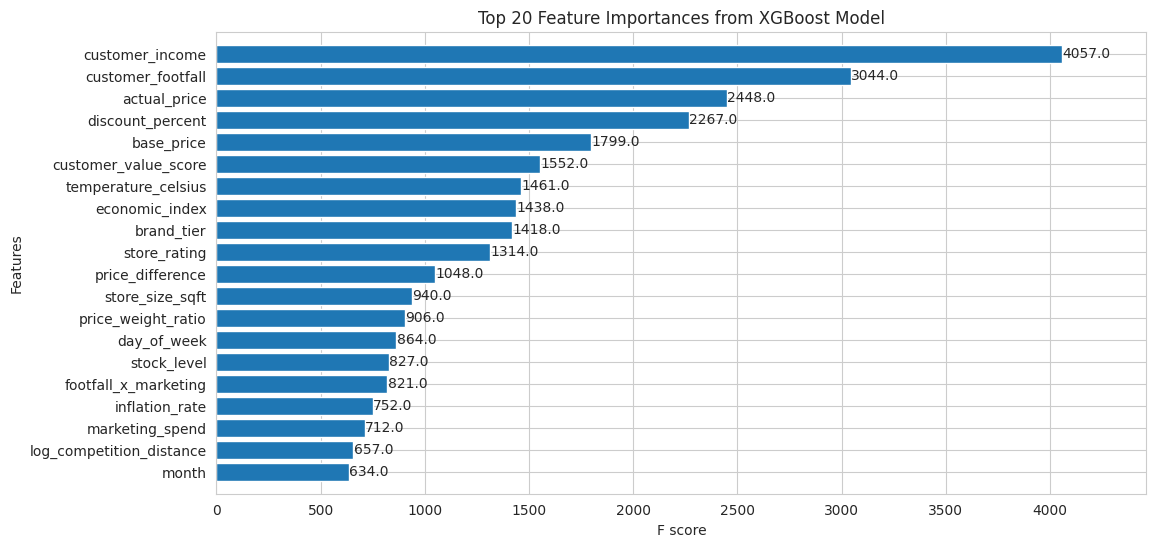

In [30]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=20, height=0.8)
plt.title('Top 20 Feature Importances from XGBoost Model')
plt.show()


#5 Hyperparameter Tuning

5.1. Hyperparameter tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_fast = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(random_state=42, tree_method='hist'),
    param_distributions=param_grid_fast,
    n_iter=5,
    scoring='neg_mean_squared_error',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=2
)

print("Starting a more EFFICIENT hyperparameter tuning process...")
random_search.fit(X_train, y_train)

print("\nBest Hyperparameters Found:")
print(random_search.best_params_)

best_xgb_model = random_search.best_estimator_

print("\nEvaluating the tuned model on the validation set...")
tuned_preds = best_xgb_model.predict(X_val)
tuned_rmse = np.sqrt(mean_squared_error(y_val, tuned_preds))
tuned_mae = mean_absolute_error(y_val, tuned_preds)
tuned_r2 = r2_score(y_val, tuned_preds)

print(f"\nTUNED XGBoost Model Performance:")
print(f"RMSE: {tuned_rmse:.4f}")
print(f"MAE: {tuned_mae:.4f}")
print(f"R-squared: {tuned_r2:.4f}")

Starting a more EFFICIENT hyperparameter tuning process...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best Hyperparameters Found:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Evaluating the tuned model on the validation set...

TUNED XGBoost Model Performance:
RMSE: 8.6209
MAE: 2.2038
R-squared: 0.5733


#6 Final Prediction on Test data

6.1. Final Prediction on Test data

--- Model Performance Comparison ---
Original XGBoost Model R-squared: 0.5735
Tuned XGBoost Model R-squared:    0.5733
------------------------------------

Decision: The Original XGBoost model performed better and is selected.

Displaying feature importance for the chosen final model:


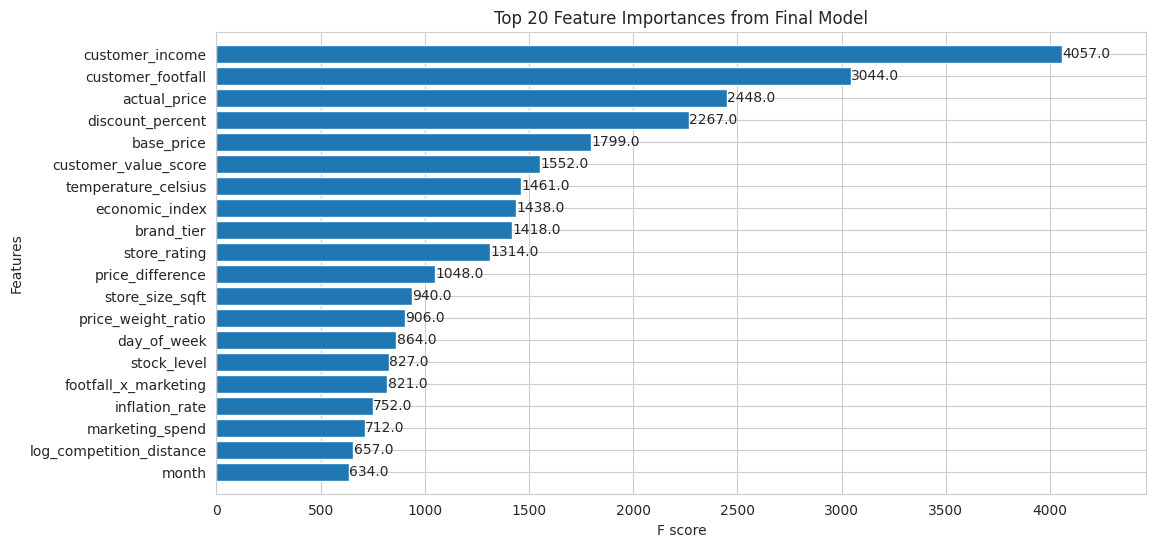


Generating final submission file using the best model...

✅ Final submission file 'giteshmalik_result.csv' created successfully!


,date,store_id,product_id,predicted_sales_quantity
0,2023-11-16,ST_0035,PR_00349,1
1,2023-11-16,ST_0098,PR_00862,7
2,2023-11-16,ST_0371,PR_00410,52
3,2023-11-16,ST_0267,PR_00208,6
4,2023-11-16,ST_0199,PR_00919,5


In [41]:
from sklearn.metrics import r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

original_r2 = r2_score(y_val, xgb_preds)
tuned_r2 = r2_score(y_val, tuned_preds)

print("--- Model Performance Comparison ---")
print(f"Original XGBoost Model R-squared: {original_r2:.4f}")
print(f"Tuned XGBoost Model R-squared:    {tuned_r2:.4f}")
print("------------------------------------")

if original_r2 >= tuned_r2:
    print("\nDecision: The Original XGBoost model performed better and is selected.")
    final_model = xgb_model
else:
    print("\nDecision: The Tuned XGBoost model performed better and is selected.")
    final_model = best_xgb_model

print("\nDisplaying feature importance for the chosen final model:")
xgb.plot_importance(final_model, max_num_features=20, height=0.8)
plt.title('Top 20 Feature Importances from Final Model')
plt.show()

print("\nGenerating final submission file using the best model...")

df_test = pd.read_csv('test.csv')
original_test_ids = df_test[['date', 'store_id', 'product_id']].copy()

df_test['date'] = pd.to_datetime(df_test['date'])
for col in ['store_size_sqft', 'competition_distance', 'customer_income', 'customer_value_score']:
    median_val = df_train[col].median()
    # CORRECTED fillna syntax
    df_test[col] = df_test[col].fillna(median_val)

current_year = df_train['date'].dt.year.max()
df_test['price_difference'] = df_test['base_price'] - df_test['actual_price']
df_test['is_discounted'] = (df_test['price_difference'] > 0).astype(int)
df_test['product_age_years'] = current_year - df_test['launch_year']
df_test['store_age_years'] = current_year - df_test['establishment_year']
# CORRECTED log1p syntax to handle potential negative values
df_test['log_competition_distance'] = np.log1p(np.maximum(0, df_test['competition_distance']))
df_test['footfall_x_marketing'] = df_test['customer_footfall'] * df_test['marketing_spend']

for col in categorical_cols:
    le = LabelEncoder()
    combined_series = pd.concat([df_train[col].astype(str), df_test[col].astype(str)], ignore_index=True).unique()
    le.fit(combined_series)
    df_test[col] = le.transform(df_test[col].astype(str))

if df_test[FEATURES].isnull().sum().sum() > 0:
    df_test.fillna(0, inplace=True)

X_test = df_test[FEATURES]
final_predictions = final_model.predict(X_test)

final_predictions_formatted = np.round(final_predictions).astype(int)
final_predictions_formatted[final_predictions_formatted < 0] = 0

submission_df = pd.DataFrame({
    'date': pd.to_datetime(original_test_ids['date']).dt.date,
    'store_id': original_test_ids['store_id'],
    'product_id': original_test_ids['product_id'],
    'predicted_sales_quantity': final_predictions_formatted
})

submission_df.to_csv('giteshmalik_result.csv', index=False)

print("\n✅ Final submission file 'giteshmalik_result.csv' created successfully!")
display(submission_df.head())
